In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# import pyutil as util

In [3]:
dirin = '/glade/p/cesmdata/cseg/inputdata/atm/cam/volc'
file_in = 'CCSM4_volcanic_1850-2008_prototype1.nc'
ds = xr.open_dataset(f'{dirin}/{file_in}')
ds.info()

xarray.Dataset {
dimensions:
	lat = 64 ;
	lev = 8 ;
	time = 1910 ;

variables:
	float32 time(time) ;
	float64 date(time) ;
		date:long_name = Date ;
		date:units = yyyymmdd ;
	float32 lev(lev) ;
		lev:bounds = ilev ;
		lev:long_name = Pressure downwards ;
		lev:units = hPa ;
		lev:standard_name = pure pressure levels ;
		lev:formula_terms = none ;
	float64 lat(lat) ;
	float64 MMRVOLC(time, lev, lat) ;
		MMRVOLC:units = kg kg-1 ;
		MMRVOLC:long_name = layer volcanic aerosol mass mixing ratio ;
	float32 colmass(time, lat) ;
	float64 datesec(time) ;

// global attributes:
	:title = Volcanic Aerosol Mass Mixing Ratio Prototype Dec 1849 to Jan 2009 for NCAR-CCSM4 ;
	:creation_date = Wed Apr  1 09:13:55 MDT 2009 ;
	:created_by = Caspar Ammann ;
	:reference = ... ;
	:aerosol_dates = Covered Period : Monthly averages Dec 1849 - Jan 2009. ;
	:aerosol_base = Derived from CCSM3_volcanic forcing ;
	:aerosol_distribution = Single aerosol distribution: sulfuric acid with reff 0.4264, med 0.375, sigm

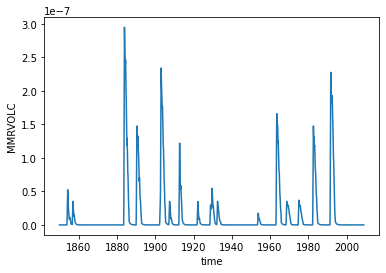

In [4]:
ds.MMRVOLC.sum(['lev']).mean('lat').plot()

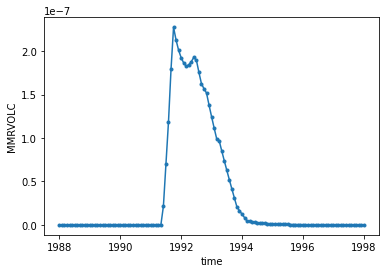

In [5]:
tslice_pinatubo = slice(1988, 1998)
ds.sel(time=tslice_pinatubo).MMRVOLC.sum(['lev']).mean('lat').plot(marker='.')

## Replace data for Pinatubo period

In [18]:
dso = ds.copy(deep=True)

ndx_novolc = np.where((1986 <= ds.time) & (ds.time < 1991))[0]
ndx_pinatubo = np.where((1991 <= ds.time) & (ds.time < 1996))[0]
assert len(ndx_pinatubo) == len(ndx_novolc)

time_window_novolc = f'{int(ds.time.values[ndx_novolc[0]])}-{int(ds.time.values[ndx_novolc[-1]])}'
time_window_pinatubo = f'{int(ds.time.values[ndx_pinatubo[0]])}-{int(ds.time.values[ndx_pinatubo[-1]])}'

dso.attrs['Note'] = f'Original forcing data from {time_window_pinatubo} replaced with data from {time_window_novolc}'

dso.MMRVOLC.values[ndx_pinatubo, :, :] = ds.MMRVOLC.values[ndx_novolc, :, :]
dso.info()

xarray.Dataset {
dimensions:
	lat = 64 ;
	lev = 8 ;
	time = 1910 ;

variables:
	float32 time(time) ;
	float64 date(time) ;
		date:long_name = Date ;
		date:units = yyyymmdd ;
	float32 lev(lev) ;
		lev:bounds = ilev ;
		lev:long_name = Pressure downwards ;
		lev:units = hPa ;
		lev:standard_name = pure pressure levels ;
		lev:formula_terms = none ;
	float64 lat(lat) ;
	float64 MMRVOLC(time, lev, lat) ;
		MMRVOLC:units = kg kg-1 ;
		MMRVOLC:long_name = layer volcanic aerosol mass mixing ratio ;
	float32 colmass(time, lat) ;
	float64 datesec(time) ;

// global attributes:
	:title = Volcanic Aerosol Mass Mixing Ratio Prototype Dec 1849 to Jan 2009 for NCAR-CCSM4 ;
	:creation_date = Wed Apr  1 09:13:55 MDT 2009 ;
	:created_by = Caspar Ammann ;
	:reference = ... ;
	:aerosol_dates = Covered Period : Monthly averages Dec 1849 - Jan 2009. ;
	:aerosol_base = Derived from CCSM3_volcanic forcing ;
	:aerosol_distribution = Single aerosol distribution: sulfuric acid with reff 0.4264, med 0.375, sigm

'1986-1990'

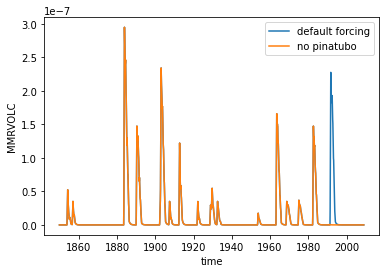

In [19]:
ds.MMRVOLC.sum(['lev']).mean('lat').plot(label='default forcing')
dso.MMRVOLC.sum(['lev']).mean('lat').plot(label='no pinatubo')
plt.legend();

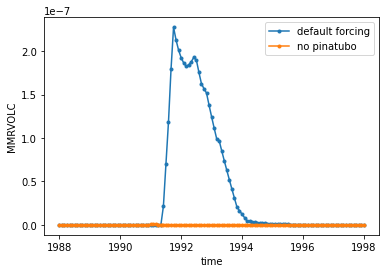

In [20]:
ds.sel(time=tslice_pinatubo).MMRVOLC.sum(['lev']).mean('lat').plot(marker='.', label='default forcing')
dso.sel(time=tslice_pinatubo).MMRVOLC.sum(['lev']).mean('lat').plot(marker='.', label='no pinatubo')
plt.legend();

## Mirror the NH data onto the SHemis for the period June 1991 to Dec 1992

In [6]:
dsh = ds.copy(deep=True)


ndx_pinatuboT = np.where((1991.4 <= ds.time) & (ds.time < 1993))[0] #get the year we wanted in SHemis

dsh.attrs['Note'] = f'Original forcing data from SHemis replaced with data from NHemis for June 1991-June 1992'

# dsh.MMRVOLC.values[ndx_pinatuboT, :, 0:32] = ds.MMRVOLC.values[ndx_pinatuboT, :, 32:] 
b = ds.MMRVOLC.values[ndx_pinatuboT, :, 32:]
dsh.MMRVOLC.values[ndx_pinatuboT, :, 0:32] = b[...,::-1] #reflect NHemisphere on to SHemis.
dsh.info()

xarray.Dataset {
dimensions:
	lat = 64 ;
	lev = 8 ;
	time = 1910 ;

variables:
	float32 time(time) ;
	float64 date(time) ;
		date:long_name = Date ;
		date:units = yyyymmdd ;
	float32 lev(lev) ;
		lev:bounds = ilev ;
		lev:long_name = Pressure downwards ;
		lev:units = hPa ;
		lev:standard_name = pure pressure levels ;
		lev:formula_terms = none ;
	float64 lat(lat) ;
	float64 MMRVOLC(time, lev, lat) ;
		MMRVOLC:units = kg kg-1 ;
		MMRVOLC:long_name = layer volcanic aerosol mass mixing ratio ;
	float32 colmass(time, lat) ;
	float64 datesec(time) ;

// global attributes:
	:title = Volcanic Aerosol Mass Mixing Ratio Prototype Dec 1849 to Jan 2009 for NCAR-CCSM4 ;
	:creation_date = Wed Apr  1 09:13:55 MDT 2009 ;
	:created_by = Caspar Ammann ;
	:reference = ... ;
	:aerosol_dates = Covered Period : Monthly averages Dec 1849 - Jan 2009. ;
	:aerosol_base = Derived from CCSM3_volcanic forcing ;
	:aerosol_distribution = Single aerosol distribution: sulfuric acid with reff 0.4264, med 0.375, sigm

In [7]:
print(ds.MMRVOLC.shape)
print(ds.MMRVOLC.dims)


(1910, 8, 64)
('time', 'lev', 'lat')


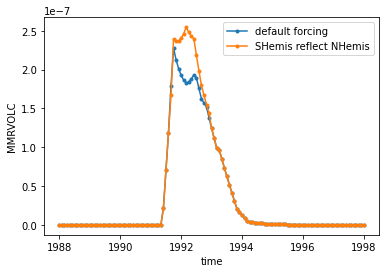

In [8]:
#plot both to see the difference this makes in global mean forcing

ds.sel(time=tslice_pinatubo).MMRVOLC.sum(['lev']).mean('lat').plot(marker='.', label='default forcing')
dsh.sel(time=tslice_pinatubo).MMRVOLC.sum(['lev']).mean('lat').plot(marker='.', label='SHemis reflect NHemis')
plt.legend();

Text(0.5, 1.0, 'SHemis sym layer volcanic aerosol mass mixing ratio (kg kg-1)')

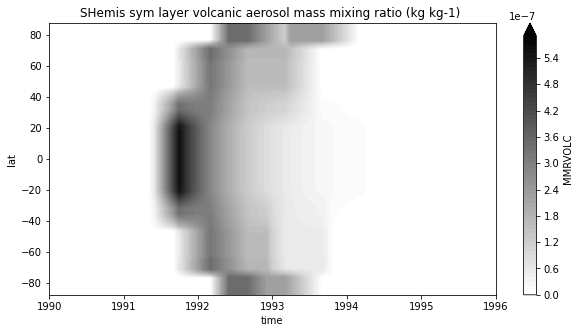

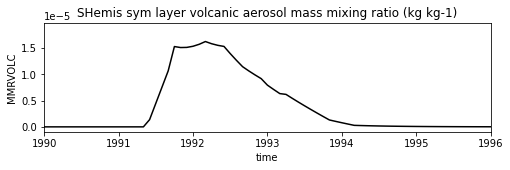

In [9]:

dsh.MMRVOLC.sum('lev').plot.contourf(x='time',figsize=(10,5),levels=np.arange(0,6e-7,0.1e-7),cmap='binary')
plt.xlim(1990,1996)
plt.title('SHemis sym ' + dsh.MMRVOLC.long_name+' ('+dsh.MMRVOLC.units+') ')

dsh.MMRVOLC.sum({'lev','lat'}).plot(x='time',figsize=(8,2),color='black')
plt.xlim(1990,1996)
plt.title('SHemis sym ' + dsh.MMRVOLC.long_name+' ('+dsh.MMRVOLC.units+')')

Text(0.5, 1.0, 'Difference, SHemis Symm - originallayer volcanic aerosol mass mixing ratio')

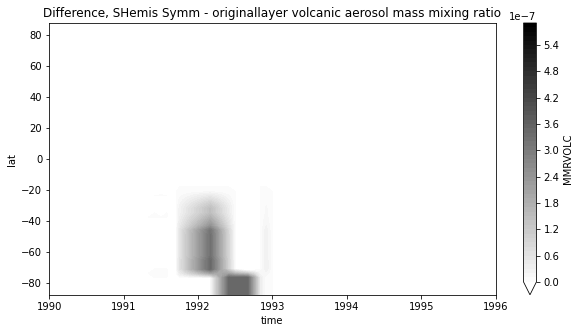

In [10]:
#galen wanted to see the difference between the original version and the SHemis symmetric one I made.

a = dsh.MMRVOLC.sum('lev') - ds.MMRVOLC.sum('lev')
a.plot.contourf(x='time',figsize=(10,5),levels=np.arange(0,6e-7,0.1e-7),cmap='binary')
# dsh.MMRVOLC.sum('lev').plot.contourf(x='time',figsize=(10,5),levels=np.arange(0,6e-7,0.1e-7),cmap='binary')
plt.xlim(1990,1996)
plt.title('Difference, SHemis Symm - original' + dsh.MMRVOLC.long_name)#+' ('+dsh.MMRVOLC.units+') ')

# write output file

In [30]:
# dirout = '/glade/u/home/afay/CESM_nopin'
# file_out = file_in.replace('.nc', '_symmetric-pinatubo.nc')
# os.makedirs(dirout, exist_ok=True)
# util.to_netcdf_clean(dsh, f'{dirout}/{file_out}')

In [11]:
dirout = '/glade/u/home/afay/CESM_nopin'
file_out = file_in.replace('.nc', '_symmetric-pinatubo.nc')

dsh.to_netcdf(f'{dirout}/{file_out}', format='NETCDF3_64BIT')